# Importing the Packages


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.set_printoptions(suppress = True, linewidth = 100, precision = 2)

# Importing the Data

In [3]:
raw_data_np = np.genfromtxt("C:\\Users\\dalkh\\OneDrive\\Desktop\\saif folder\\DATA SCIENCE\\DATA ANALYST\\loan-data.csv", delimiter = ";", skip_header = 1, autostrip = True)
raw_data_np

array([[48010226.  ,         nan,    35000.  , ...,         nan,         nan,     9452.96],
       [57693261.  ,         nan,    30000.  , ...,         nan,         nan,     4679.7 ],
       [59432726.  ,         nan,    15000.  , ...,         nan,         nan,     1969.83],
       ...,
       [50415990.  ,         nan,    10000.  , ...,         nan,         nan,     2185.64],
       [46154151.  ,         nan,         nan, ...,         nan,         nan,     3199.4 ],
       [66055249.  ,         nan,    10000.  , ...,         nan,         nan,      301.9 ]])

# Visualization: Raw Data

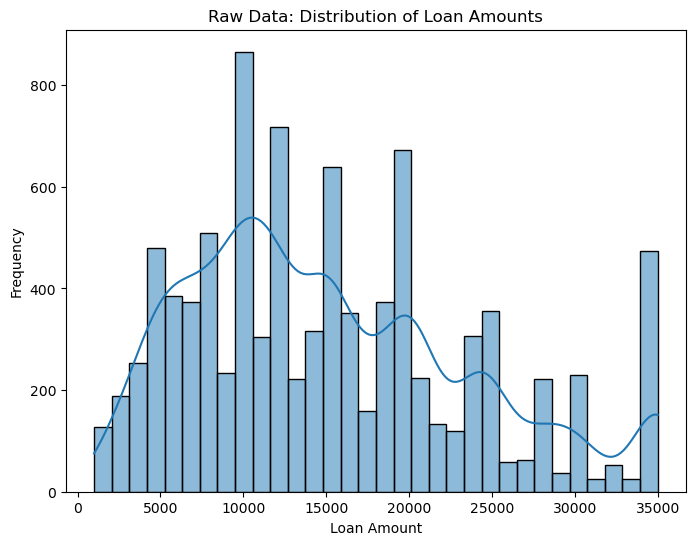

In [124]:
plt.figure(figsize=(8, 6))
sns.histplot(raw_data_np[:, 2], kde=True)  
plt.title('Raw Data: Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Checking for Incomplete Data

In [4]:
np.isnan(raw_data_np).sum()

88005

In [5]:
temporary_fill = np.nanmax(raw_data_np) + 1
temporary_mean = np.nanmean(raw_data_np, axis = 0)

C:\Users\dalkh\AppData\Local\Temp\ipykernel_1928\3983241459.py:2: RuntimeWarning: Mean of empty slice
  temporary_mean = np.nanmean(raw_data_np, axis = 0)


In [6]:
temporary_mean

array([54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
            440.92,         nan,         nan,         nan,         nan,         nan,     3143.85])

In [7]:
temporary_stats = np.array([np.nanmin(raw_data_np, axis = 0),
                           temporary_mean,
                           np.nanmax(raw_data_np, axis = 0)])

C:\Users\dalkh\AppData\Local\Temp\ipykernel_1928\2183409543.py:1: RuntimeWarning: All-NaN slice encountered
  temporary_stats = np.array([np.nanmin(raw_data_np, axis = 0),
C:\Users\dalkh\AppData\Local\Temp\ipykernel_1928\2183409543.py:3: RuntimeWarning: All-NaN slice encountered
  np.nanmax(raw_data_np, axis = 0)])


In [8]:
temporary_stats

array([[  373332.  ,         nan,     1000.  ,         nan,     1000.  ,         nan,        6.  ,
              31.42,         nan,         nan,         nan,         nan,         nan,        0.  ],
       [54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
             440.92,         nan,         nan,         nan,         nan,         nan,     3143.85],
       [68616519.  ,         nan,    35000.  ,         nan,    35000.  ,         nan,       28.99,
            1372.97,         nan,         nan,         nan,         nan,         nan,    41913.62]])

# Splitting the Dataset

# Splitting the Columns

In [9]:
columns_strings = np.argwhere(np.isnan(temporary_mean)).squeeze()
columns_strings

array([ 1,  3,  5,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
columns_numeric = np.argwhere(np.isnan(temporary_mean) == False).squeeze()
columns_numeric

array([ 0,  2,  4,  6,  7, 13], dtype=int64)

# Re-importing the Dataset

In [11]:
loan_data_strings = np.genfromtxt("C:\\Users\\dalkh\\OneDrive\\Desktop\\saif folder\\DATA SCIENCE\\DATA ANALYST\\loan-data.csv",
                                  delimiter = ';',
                                  skip_header = 1,
                                  autostrip = True, 
                                  usecols = columns_strings,
                                  dtype = np.str_)
loan_data_strings

array([['May-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']],
      dtype='<U69')

In [12]:
loan_data_numeric = np.genfromtxt("C:\\Users\\dalkh\\OneDrive\\Desktop\\saif folder\\DATA SCIENCE\\DATA ANALYST\\loan-data.csv",
                                  delimiter = ';',
                                  autostrip = True,
                                  skip_header = 1,
                                  usecols = columns_numeric,
                                  filling_values = temporary_fill)
loan_data_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]])

# The Names of the Columns

In [13]:
header_full = np.genfromtxt("C:\\Users\\dalkh\\OneDrive\\Desktop\\saif folder\\DATA SCIENCE\\DATA ANALYST\\loan-data.csv",
                            delimiter = ';',
                            autostrip = True,
                            skip_footer = raw_data_np.shape[0],
                            dtype = np.str_)
header_full

array(['id', 'issue_d', 'loan_amnt', 'loan_status', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state',
       'total_pymnt'], dtype='<U19')

In [14]:
header_strings, header_numeric = header_full[columns_strings], header_full[columns_numeric]

In [15]:
header_strings

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [16]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

# Creating Checkpoints:

In [17]:
def checkpoint(file_name, checkpoint_header, checkpoint_data):
    np.savez(file_name, header = checkpoint_header, data = checkpoint_data)
    checkpoint_variable = np.load(file_name + ".npz")
    return(checkpoint_variable)

In [18]:
checkpoint_test = checkpoint("checkpoint-test", header_strings, loan_data_strings)

In [19]:
checkpoint_test['data']

array([['May-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']],
      dtype='<U69')

In [20]:
np.array_equal(checkpoint_test['data'], loan_data_strings)

True

# Manipulating String Columns

In [21]:
header_strings

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [22]:
header_strings[0] = "issue_date"

In [23]:
loan_data_strings

array([['May-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '',
        'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']],
      dtype='<U69')

# Issue Date

In [24]:
np.unique(loan_data_strings[:,0])

array(['', 'Apr-15', 'Aug-15', 'Dec-15', 'Feb-15', 'Jan-15', 'Jul-15', 'Jun-15', 'Mar-15',
       'May-15', 'Nov-15', 'Oct-15', 'Sep-15'], dtype='<U69')

In [25]:
loan_data_strings[:,0] = np.chararray.strip(loan_data_strings[:,0], "-15")

In [26]:
np.unique(loan_data_strings[:,0])

array(['', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='<U69')

In [27]:
months = np.array(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [28]:
for i in range(13):
        loan_data_strings[:,0] = np.where(loan_data_strings[:,0] == months[i],
                                          i,
                                          loan_data_strings[:,0])

In [29]:
np.unique(loan_data_strings[:,0])

array(['0', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U69')

# Loan Status

In [30]:
header_strings

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [31]:
np.unique(loan_data_strings[:,1])

array(['', 'Charged Off', 'Current', 'Default', 'Fully Paid', 'In Grace Period', 'Issued',
       'Late (16-30 days)', 'Late (31-120 days)'], dtype='<U69')

In [32]:
np.unique(loan_data_strings[:,1]).size

9

In [33]:
status_bad = np.array(['','Charged Off','Default','Late (31-120 days)'])

In [34]:
loan_data_strings[:,1] = np.where(np.isin(loan_data_strings[:,1], status_bad),0,1)

In [35]:
np.unique(loan_data_strings[:,1])

array(['0', '1'], dtype='<U69')

# Visualization: Loan Status Proportion

In [37]:
plt.figure(figsize=(6, 6))
loan_status_counts = np.unique(loan_data_strings[:, 1], return_counts=True)[1]
loan_status_labels = ['Good Loans', 'Bad Loans']

<Figure size 600x600 with 0 Axes>

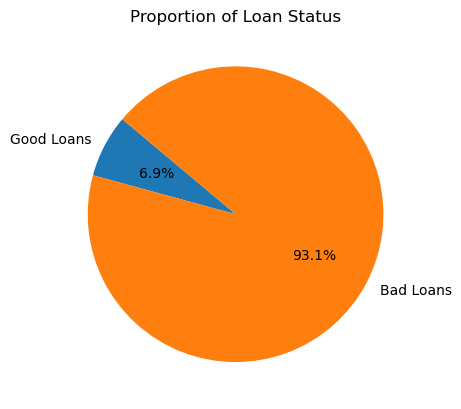

In [38]:
plt.pie(loan_status_counts, labels=loan_status_labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Loan Status')
plt.show()

# Term

In [39]:
header_strings

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [40]:
np.unique(loan_data_strings[:,2])

array(['', '36 months', '60 months'], dtype='<U69')

In [41]:
loan_data_strings[:,2] = np.chararray.strip(loan_data_strings[:,2], " months")
loan_data_strings[:,2]

array(['36', '36', '36', ..., '36', '36', '36'], dtype='<U69')

In [42]:
header_strings[2] = "term_months"

In [43]:
loan_data_strings[:,2] = np.where(loan_data_strings[:,2] == '', 
                                  '60', 
                                  loan_data_strings[:,2])
loan_data_strings[:,2]

array(['36', '36', '36', ..., '36', '36', '36'], dtype='<U69')

In [44]:
np.unique(loan_data_strings[:,2])

array(['36', '60'], dtype='<U69')

# Visualization: Terms of Loan

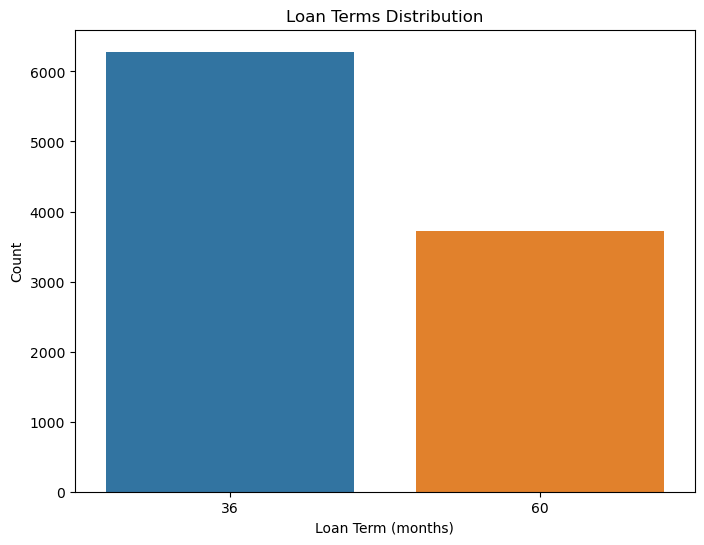

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x=loan_data_strings[:, 2])
plt.title('Loan Terms Distribution')
plt.xlabel('Loan Term (months)')
plt.ylabel('Count')
plt.show()

# Grade and Subgrade

In [46]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'grade', 'sub_grade', 'verification_status',
       'url', 'addr_state'], dtype='<U19')

In [47]:
np.unique(loan_data_strings[:,3])

array(['', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U69')

In [48]:
np.unique(loan_data_strings[:,4])

array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], dtype='<U69')

# Filling Sub Grade

In [49]:
for i in np.unique(loan_data_strings[:,3])[1:]:
    loan_data_strings[:,4] = np.where((loan_data_strings[:,4] == '') & (loan_data_strings[:,3] == i),
                                      i + '5',
                                      loan_data_strings[:,4])

In [50]:
np.unique(loan_data_strings[:,4], return_counts = True)

(array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
        'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
        'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], dtype='<U69'),
 array([  9, 285, 278, 239, 323, 592, 509, 517, 530, 553, 633, 629, 567, 586, 564, 577, 391, 267,
        250, 255, 288, 235, 162, 171, 139, 160,  94,  52,  34,  43,  24,  19,  10,   3,   7,   5],
       dtype=int64))

In [51]:
loan_data_strings[:,4] = np.where(loan_data_strings[:,4] == '',
                                  'H1',
                                  loan_data_strings[:,4])

In [52]:
np.unique(loan_data_strings[:,4])

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'H1'], dtype='<U69')

# Removing Grade

In [53]:
loan_data_strings = np.delete(loan_data_strings, 3, axis = 1)

In [54]:
loan_data_strings[:,3]

array(['C3', 'A5', 'B5', ..., 'A5', 'D2', 'A4'], dtype='<U69')

In [55]:
header_strings = np.delete(header_strings, 3)

In [56]:
header_strings[3]

'sub_grade'

# Converting Sub Grade

In [57]:
np.unique(loan_data_strings[:,3])

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'H1'], dtype='<U69')

In [58]:
keys = list(np.unique(loan_data_strings[:,3]))                         
values = list(range(1, np.unique(loan_data_strings[:,3]).shape[0] + 1)) 
dict_sub_grade = dict(zip(keys, values))

In [59]:
dict_sub_grade

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35,
 'H1': 36}

In [60]:
for i in np.unique(loan_data_strings[:,3]):
        loan_data_strings[:,3] = np.where(loan_data_strings[:,3] == i, 
                                          dict_sub_grade[i],
                                          loan_data_strings[:,3])

In [61]:
np.unique(loan_data_strings[:,3])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36',
       '4', '5', '6', '7', '8', '9'], dtype='<U69')

# Verification Status

In [62]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'url',
       'addr_state'], dtype='<U19')

In [63]:
np.unique(loan_data_strings[:,4])

array(['', 'Not Verified', 'Source Verified', 'Verified'], dtype='<U69')

In [64]:
loan_data_strings[:,4] = np.where((loan_data_strings[:,4] == "") | (loan_data_strings[:,4] == "Not Verified"),0,1)

In [65]:
np.unique(loan_data_strings[:,4])

array(['0', '1'], dtype='<U69')

# URL

In [66]:
loan_data_strings[:,5]

array(['https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', ...,
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249'], dtype='<U69')

In [67]:
np.chararray.strip(loan_data_strings[:,5],"https://www.lendingclub.com/browse/loanDetail.action?loan_id=")

chararray(['48010226', '57693261', '59432726', ..., '50415990', '46154151', '66055249'],
          dtype='<U69')

In [68]:
loan_data_strings[:,5] = np.chararray.strip(loan_data_strings[:,5],"https://www.lendingclub.com/browse/loanDetail.action?loan_id=")

In [69]:
header_full

array(['id', 'issue_d', 'loan_amnt', 'loan_status', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state',
       'total_pymnt'], dtype='<U19')

In [70]:
loan_data_numeric[:,0].astype(dtype = np.int32)

array([48010226, 57693261, 59432726, ..., 50415990, 46154151, 66055249])

In [71]:
loan_data_strings[:,5].astype(dtype = np.int32)

array([48010226, 57693261, 59432726, ..., 50415990, 46154151, 66055249])

In [72]:
np.array_equal(loan_data_numeric[:,0].astype(dtype = np.int32),loan_data_strings[:,5].astype(dtype = np.int32))

True

In [73]:
loan_data_strings = np.delete(loan_data_strings, 5,axis = 1)
header_strings = np.delete(header_strings,5)

In [74]:
loan_data_strings[:,5]

array(['CA', 'NY', 'PA', ..., 'CA', 'OH', 'IL'], dtype='<U69')

In [75]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'addr_state'], dtype='<U19')

In [76]:
loan_data_numeric[:,0]

array([48010226., 57693261., 59432726., ..., 50415990., 46154151., 66055249.])

In [77]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

# State Address

In [78]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'addr_state'], dtype='<U19')

In [79]:
header_strings[5] = "state address"

In [80]:
np.unique(loan_data_strings[:,5])

array(['', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN',
       'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U69')

In [81]:
states_names, states_count = np.unique(loan_data_strings[:,5], return_counts = True)
states_count_sorted = np.argsort(-states_count)
states_names[states_count_sorted],states_count[states_count_sorted]

(array(['CA', 'NY', 'TX', 'FL', '', 'IL', 'NJ', 'GA', 'PA', 'OH', 'MI', 'NC', 'VA', 'MD', 'AZ',
        'WA', 'MA', 'CO', 'MO', 'MN', 'IN', 'WI', 'CT', 'TN', 'NV', 'AL', 'LA', 'OR', 'SC', 'KY',
        'KS', 'OK', 'UT', 'AR', 'MS', 'NH', 'NM', 'WV', 'HI', 'RI', 'MT', 'DE', 'DC', 'WY', 'AK',
        'NE', 'SD', 'VT', 'ND', 'ME'], dtype='<U69'),
 array([1336,  777,  758,  690,  500,  389,  341,  321,  320,  312,  267,  261,  242,  222,  220,
         216,  210,  201,  160,  156,  152,  148,  143,  143,  130,  119,  116,  108,  107,   84,
          84,   83,   74,   74,   61,   58,   57,   49,   44,   40,   28,   27,   27,   27,   26,
          25,   24,   17,   16,   10], dtype=int64))

In [82]:
loan_data_strings[:,5] = np.where(loan_data_strings[:,5] == "",
                                 0,
                                 loan_data_strings[:,5])

In [83]:
states_west = np.array(['WA','OR','CA','NV','ID','MT','WY','UT','CO','AZ','NM','HI','AK',])
states_south = np.array(['TX','OK','AR','LA','MS','AL','TN','KY','FL','GA','SC','NC','VA','WV','MD','DE','DC'])
states_midwest = np.array(['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH'])
states_east = np.array(['PA','NY','NJ','CT','MA','VT','NH','ME','RI'])

In [84]:
loan_data_strings[:,5] = np.where(np.isin(loan_data_strings[:,5], states_west),1,loan_data_strings[:,5])
loan_data_strings[:,5] = np.where(np.isin(loan_data_strings[:,5], states_south),2,loan_data_strings[:,5])
loan_data_strings[:,5] = np.where(np.isin(loan_data_strings[:,5], states_midwest),3,loan_data_strings[:,5])
loan_data_strings[:,5] = np.where(np.isin(loan_data_strings[:,5], states_east),4,loan_data_strings[:,5])

In [85]:
np.unique(loan_data_strings[:,5])

array(['0', '1', '2', '3', '4'], dtype='<U69')

# Visualization: Loan amount by state

In [86]:
states_names, states_count = np.unique(loan_data_strings[:, 5], return_counts=True)

In [87]:
loan_amount_by_state = []

In [88]:
for state in states_names:
    state_indices = np.where(loan_data_strings[:, 5] == state)
    loan_amount_by_state.append(np.sum(loan_data_numeric[state_indices, 1]))

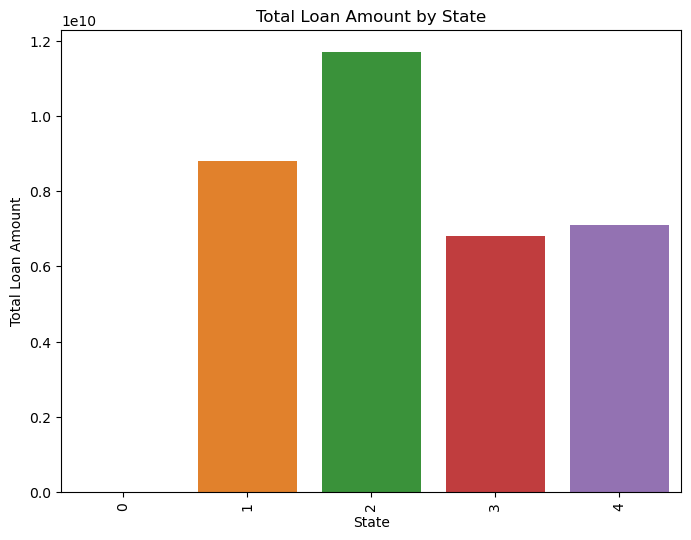

In [89]:
plt.figure(figsize=(8, 6))
sns.barplot(x=states_names, y=loan_amount_by_state)
plt.title('Total Loan Amount by State')
plt.xlabel('State')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=90)
plt.show()

# Converting to Numbers

In [90]:
loan_data_strings

array([['5', '1', '36', '13', '1', '1'],
       ['0', '1', '36', '5', '1', '4'],
       ['9', '1', '36', '10', '1', '4'],
       ...,
       ['6', '1', '36', '5', '1', '1'],
       ['4', '1', '36', '17', '1', '3'],
       ['12', '1', '36', '4', '0', '3']], dtype='<U69')

In [91]:
loan_data_strings.astype(np.int32)

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

# Checkpoint 1: Strings

In [92]:
checkpoint_strings = checkpoint("checkpoint-strings",header_strings,loan_data_strings)

In [93]:
checkpoint_strings["header"]

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status',
       'state address'], dtype='<U19')

In [94]:
checkpoint_strings["data"]

array([['5', '1', '36', '13', '1', '1'],
       ['0', '1', '36', '5', '1', '4'],
       ['9', '1', '36', '10', '1', '4'],
       ...,
       ['6', '1', '36', '5', '1', '1'],
       ['4', '1', '36', '17', '1', '3'],
       ['12', '1', '36', '4', '0', '3']], dtype='<U69')

In [95]:
np.equal(checkpoint_strings["data"],loan_data_strings)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       ...,
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

# Manipulating Numeric Data

In [96]:
loan_data_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]])

In [97]:
np.isnan(loan_data_numeric).sum()

0

# Substitute "Filler" values

In [98]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

# ID

In [99]:
temporary_fill

68616520.0

In [100]:
np.isin(loan_data_numeric[:,0], temporary_fill)

array([False, False, False, ..., False, False, False])

In [101]:
np.isin(loan_data_numeric[:,0], temporary_fill).sum()

0

In [102]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

# Temporary Stats

In [103]:
temporary_stats

array([[  373332.  ,         nan,     1000.  ,         nan,     1000.  ,         nan,        6.  ,
              31.42,         nan,         nan,         nan,         nan,         nan,        0.  ],
       [54015809.19,         nan,    15273.46,         nan,    15311.04,         nan,       16.62,
             440.92,         nan,         nan,         nan,         nan,         nan,     3143.85],
       [68616519.  ,         nan,    35000.  ,         nan,    35000.  ,         nan,       28.99,
            1372.97,         nan,         nan,         nan,         nan,         nan,    41913.62]])

In [104]:
temporary_stats[:, columns_numeric]

array([[  373332.  ,     1000.  ,     1000.  ,        6.  ,       31.42,        0.  ],
       [54015809.19,    15273.46,    15311.04,       16.62,      440.92,     3143.85],
       [68616519.  ,    35000.  ,    35000.  ,       28.99,     1372.97,    41913.62]])

# Funded Amount

In [105]:
loan_data_numeric[:,2]

array([35000., 30000., 15000., ..., 10000., 10000., 10000.])

In [106]:
loan_data_numeric[:,2] = np.where(loan_data_numeric[:,2] == temporary_fill,
                                  temporary_stats[0,columns_numeric[2]],
                                  loan_data_numeric[:,2])
loan_data_numeric[:,2]

array([35000., 30000., 15000., ..., 10000., 10000., 10000.])

# Loaned Amount, Interest Rate, Total Payment, Installment

In [107]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [108]:
for i in [1,3,4,5]:
    loan_data_numeric[:,i] = np.where(loan_data_numeric[:,i] == temporary_fill,
                                  temporary_stats[2,columns_numeric[i]],
                                  loan_data_numeric[:,i])

In [109]:
loan_data_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  ,       28.99,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  ,       28.99,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  ,       28.99,     1372.97,     2185.64],
       [46154151.  ,    35000.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  ,       28.99,      309.97,      301.9 ]])

# Visualization: Distribution of Loan amounts

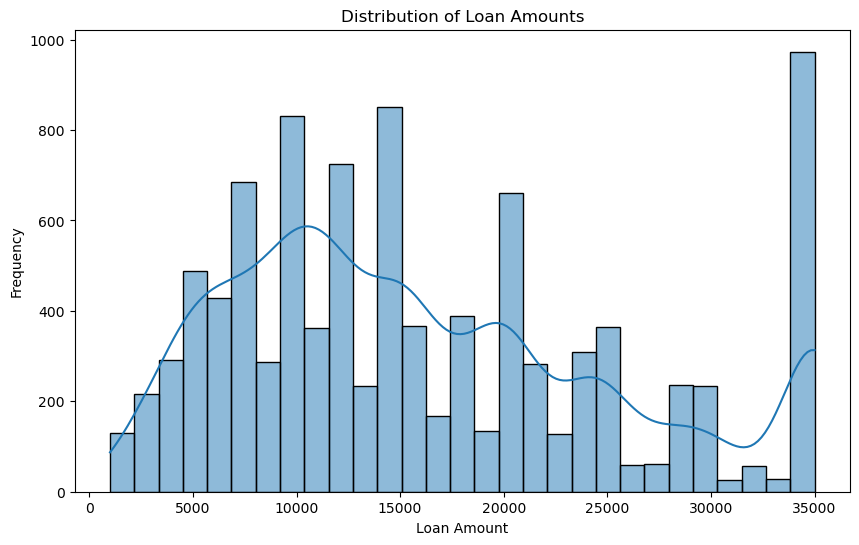

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_numeric[:, 1], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Visualization: Distribution of Interest

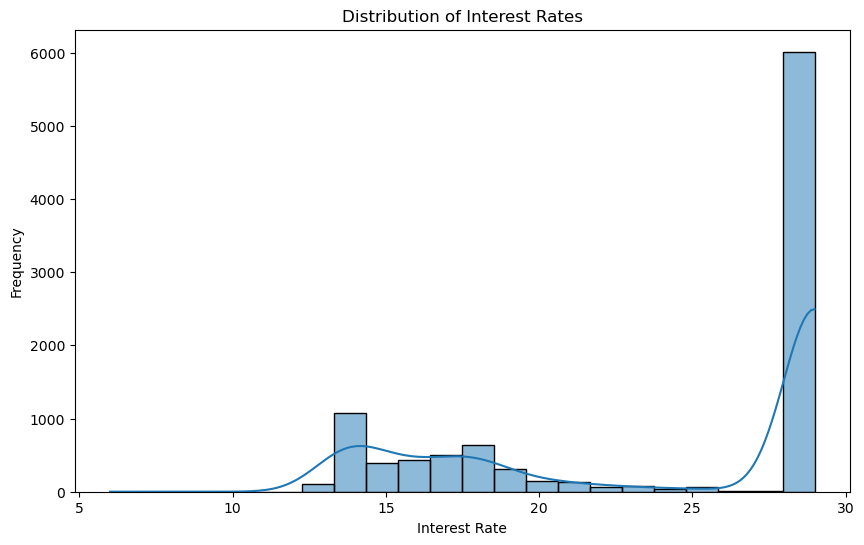

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_numeric[:, 3], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

# Checkpoint 2: Numeric

In [112]:
checkpoint_numeric = checkpoint("checkpoint-numeric", header_numeric,loan_data_numeric)

In [113]:
checkpoint_numeric['header'], checkpoint_numeric['data']

(array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19'),
 array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
        [57693261.  ,    30000.  ,    30000.  ,       28.99,      938.57,     4679.7 ],
        [59432726.  ,    15000.  ,    15000.  ,       28.99,      494.86,     1969.83],
        ...,
        [50415990.  ,    10000.  ,    10000.  ,       28.99,     1372.97,     2185.64],
        [46154151.  ,    35000.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
        [66055249.  ,    10000.  ,    10000.  ,       28.99,      309.97,      301.9 ]]))

# Creating the "Complete" Dataset

In [114]:
checkpoint_strings["data"].shape

(10000, 6)

In [115]:
checkpoint_numeric["data"].shape

(10000, 6)

In [116]:
loan_data = np.hstack((checkpoint_numeric["data"],checkpoint_strings["data"]))

In [117]:
loan_data

array([['48010226.0', '35000.0', '35000.0', ..., '13', '1', '1'],
       ['57693261.0', '30000.0', '30000.0', ..., '5', '1', '4'],
       ['59432726.0', '15000.0', '15000.0', ..., '10', '1', '4'],
       ...,
       ['50415990.0', '10000.0', '10000.0', ..., '5', '1', '1'],
       ['46154151.0', '35000.0', '10000.0', ..., '17', '1', '3'],
       ['66055249.0', '10000.0', '10000.0', ..., '4', '0', '3']], dtype='<U69')

In [118]:
header_full = np.concatenate((checkpoint_numeric["header"],checkpoint_strings["header"]))

# Sorting the New Dataset

In [119]:
loan_data = loan_data[np.argsort(loan_data[:,0])]

In [120]:
loan_data

array([['12606806.0', '24975.0', '24975.0', ..., '10', '1', '2'],
       ['13026045.0', '12000.0', '12000.0', ..., '13', '1', '2'],
       ['1312426.0', '15000.0', '15000.0', ..., '16', '1', '4'],
       ...,
       ['8138291.0', '10350.0', '1000.0', ..., '26', '1', '4'],
       ['8214572.0', '7000.0', '7000.0', ..., '11', '1', '2'],
       ['849994.0', '11400.0', '11400.0', ..., '10', '0', '1']], dtype='<U69')

In [121]:
np.argsort(loan_data[:,0])

array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64)

# Visualization: Cleaned Data

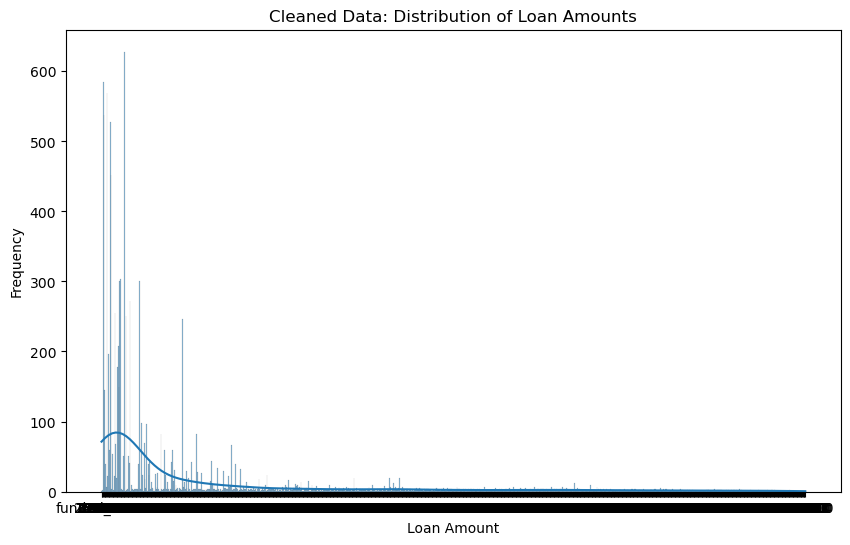

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data[:, 2], kde=True)  
plt.title('Cleaned Data: Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Storing the New Dataset

In [122]:
loan_data = np.vstack((header_full,loan_data))

In [123]:
np.savetxt("loan-data-preprocessed.csv", 
           loan_data, 
           fmt="%s",
           delimiter=",")